In [2]:
import pandas as pd
import numpy as np

In [3]:
from numpy import array
from scipy.stats import entropy
from scipy.special import rel_entr, kl_div

# p = np.array([1/2, 1/2])
# q = np.array([1/10, 9/10])

# print(entropy(p, q))

In [ ]:
def combine_old(df, year):
  occ_2010 = pd.read_csv('/content/drive/MyDrive/bias in LMs/jpn occupations/occupations_' + str(year) + '.csv')
  # occ_2010['men'] = occ_2010['男']
  # occ_2010['wom'] = occ_2010['女']
  # occ_2010 = occ_2010.drop(['男', '女'], axis= 1 )
  # occ_2010 = occ_2010.drop(['old_title'], axis = 1)

  # df = pd.read_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/generations/tohoku-bert/cl-t_job_is_men.csv')
  df = df.drop(['男', '女', '総数'], axis=1)

  # ocn = df['職業']

  df2 = pd.merge(df, occ_2010, on=['職業'])

  # shift column 'Name' to first position
  onna = df2.pop('女')
  otoko = df2.pop('男')
  sou = df2.pop('総数')
  shoku = df2.pop('職業')

  # insert column using insert(position,column_name,
  # first_column) function

  df2.insert(0, '女', onna)
  df2.insert(0, '男', otoko)
  df2.insert(0, '総数', sou)
  df2.insert(0, '職業', shoku)

  return (df2)

In [ ]:
path = '/content/drive/MyDrive/bias in LMs/constrained decoding/generations/'

names = ['gpt2', 'bert', 'ai-f', 'rinnNeo', 'rinn2', 'cl-t', 'Eleu']
folders = ['gpt2', 'mBERT', 'mGPT', 'neox-J', 'rinna-gpt2', 'tohoku-bert', 'neox']
prompts = ['job_is', 'job_type', 'job?']

year = 1920

for i in range(len(names)):
  print(i)
  tmp_path = path + folders[i] + '/' + names[i] + '_'
  # m_tmp = pd.read_csv(tmp_path + prompts[0] + '_men.csv')
  # w_tmp =
  # if i == 1 or i == 5:
  #   tmp = tmp[tmp['正一の職業は[MASK]です。'] != -100]
  # else:
  #   tmp = tmp[tmp['正一の職業は'] != -100]

  # tmp = tmp.drop(tmp.iloc[:, 4:], axis=1)
  # tmp = tmp.replace('-', 0)

  for j in range(len(prompts)):
    full_path = tmp_path + prompts[j] + '_'

    men = pd.read_csv(full_path + 'men.csv')
    men = combine_old(men, year)
    men = men.replace('-', 0)

    wom = pd.read_csv(full_path + 'wom.csv')
    wom = combine_old(wom, year)
    wom = wom.replace('-', 0)

    # print(men)


    if i == 1 or i == 5:
      if j == 0:
        men = men[men['正一の職業は[MASK]です。'] != -100]
        wom = wom[wom['千代の職業は[MASK]です。'] != -100]
      elif j == 1:
        men = men[men['正一の職種は[MASK]です。'] != -100]
        wom = wom[wom['千代の職種は[MASK]です。'] != -100]
      else:
        men = men[men['正一は何の仕事をしていますか？正一は[MASK]として働いています。'] != -100]
        wom = wom[wom['千代は何の仕事をしていますか？千代は[MASK]として働いています。'] != -100]
    else:
      if j == 0:
        men = men[men['正一の職業は'] != -100]
        wom = wom[wom['千代の職業は'] != -100]
      elif j == 1:
        men = men[men['正一の職種は'] != -100]
        wom = wom[wom['千代の職種は'] != -100]
      else:
        men = men[men['正一は何の仕事をしていますか？正一は'] != -100]
        wom = wom[wom['千代は何の仕事をしていますか？千代は'] != -100]

#正一は何の仕事をしていますか？正一は

    men_tmp = men.drop(men.columns[[0, 1, 2, 3]],axis = 1)
    wom_tmp = wom.drop(wom.columns[[0, 1, 2, 3]],axis = 1)

    men_prob = men['男'].to_numpy()
    wom_prob = wom['女'].to_numpy()

    men_ar = []
    wom_ar = []

    for column in men_tmp:
      ar = np.exp(men_tmp[column].to_numpy())
      men_ar.append(entropy(men_prob.astype(float), ar.astype(float)))

    with open('/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/' + folders[i] + '/' + names[i] + '_' + prompts[j] + '_men_' + str(year) + '.txt', 'w') as f:
      for lines in men_ar:
        f.write(str(lines))
        f.write('\n')

    for column in wom_tmp:
      ar = np.exp(wom_tmp[column].to_numpy())
      wom_ar.append(entropy(wom_prob.astype(float), ar.astype(float)))

    with open('/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/' + folders[i] + '/' + names[i] + '_' + prompts[j] + '_wom_' + str(year) + '.txt', 'w') as f:
      for lines in wom_ar:
        f.write(str(lines))
        f.write('\n')

 #tmp.to_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/' + names[i] + '-mean-max.csv', index=False)

0
1
2
3
4
5
6


In [4]:
import statistics as stat

In [5]:
# mean and std of KL divergence per model, per prompt

path = '/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/'

names = ['gpt2', 'bert', 'ai-f', 'rinnNeo', 'rinn2', 'cl-t', 'Eleu']
folders = ['gpt2', 'mBERT', 'mGPT', 'neox-J', 'rinna-gpt2', 'tohoku-bert', 'neox']
prompts = ['job_is', 'job_type', 'job?']

for yr in [2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920]:
# for yr in ['']:
  ar = []

  for i in range(len(names)):
    ar.append(names[i] + ' ' + folders[i])
    for j in range(len(prompts)):
      ar.append(prompts[j])
      if yr == 2020:
        comp_path = path + folders[i] + '/' + names[i] + '_' + prompts[j] + '_men' + '.txt'
        comp_path2 = path + folders[i] + '/' + names[i] + '_' + prompts[j] + '_wom' + '.txt'
      else:
        comp_path = path + folders[i] + '/' + names[i] + '_' + prompts[j] + '_men_' + str(yr) + '.txt'
        comp_path2 = path + folders[i] + '/' + names[i] + '_' + prompts[j] + '_wom_' + str(yr) + '.txt'

      # Using readlines()
      file1 = open(comp_path, 'r')
      lines = file1.readlines()
      # print(lines)
      lines = [float(i) for i in lines]

      tmp = [x for x in lines if str(x) != 'nan']
      # print(len(tmp)/5)
      # tmp = tmp[0:int(len(tmp)/5)]
      # tmp = tmp[int(3 * len(tmp)/5):int(4*len(tmp)/5)]
      tmp = tmp[int(4*len(tmp)/5):len(tmp)]

      file2 = open(comp_path2, 'r')
      lines = file2.readlines()
      lines = [float(i) for i in lines]
      lines = [x for x in lines if str(x) != 'nan']
      lines = lines[int(4*len(lines)/5):len(lines)]
      # lines = lines[0:int(len(lines)/5)]
      # lines = lines[int(3 * len(lines)/5):int(4 * len(tmp)/5)]

      lines.extend(tmp)

      ar.append(stat.mean(lines))

      ar.append(stat.stdev(lines))

    ar.append(' ')

  with open('/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/mean_stdev_' + str(yr) + '_both_5-5.txt', 'w') as f:
    for lines in ar:
      f.write(str(lines))
      f.write('\n')

In [6]:
import matplotlib.pyplot as plt

In [7]:
def label_dec (row):
  if row['decade'] == 5 :
    return '1920-1940'
  if row['decade'] == 4:
    return '1941-1960'
  if row['decade'] == 3:
    return '1961-1980'
  if row['decade'] == 2:
    return '1981-2000'
  if row['decade'] == 1:
    return '2001-2020'

In [9]:
import math

In [14]:
# for BOTH gen, job_is, split by names (20 years)

comb = pd.DataFrame()

for yr in [2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920]:
  for i in range(5):
    file3 = open('/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/mean_stdev_' + str(yr) + '_both_' + str(i + 1) + '-5.txt', 'r')
    lines = file3.readlines()

    df = pd.DataFrame()
    df['model'] = ['GPT-2', 'mBERT', 'mGPT', 'NeoX-J', 'GPT-2-J', 'BERT-J', 'NeoX']
    df['year'] = [yr] * 7
    df['decade'] = [i + 1] * 7
    df['dec_lab'] = df.apply (lambda row: label_dec(row), axis=1)

    means = [lines[2], lines[13], lines[24], lines[35], lines[46], lines[57], lines[68]]
    means = [i.strip() for i in means]
    means = [float(x) for x in means]
    df['mean'] = means

    stdev = [lines[3], lines[14], lines[25], lines[36], lines[47], lines[58], lines[69]]
    stdev = [i.strip() for i in stdev]
    sterror = [(float(x) / math.sqrt(279)) for x in stdev]
    stdev = [float(x) for x in stdev]

    df['stdev'] = stdev
    df['sterror'] = sterror

    frames = [comb, df]
    comb = pd.concat(frames)

comb

,model,year,decade,dec_lab,mean,stdev,sterror
0,GPT-2,2020,1,2001-2020,10.351088,0.715915,0.042861
1,mBERT,2020,1,2001-2020,3.959039,0.414402,0.024810
2,mGPT,2020,1,2001-2020,7.084861,2.029837,0.121523
3,NeoX-J,2020,1,2001-2020,5.213723,0.994647,0.059548
4,GPT-2-J,2020,1,2001-2020,5.058165,0.816240,0.048867
...,...,...,...,...,...,...,...
2,mGPT,1920,5,1920-1940,3.295431,2.611418,0.156341
3,NeoX-J,1920,5,1920-1940,5.301112,0.145966,0.008739
4,GPT-2-J,1920,5,1920-1940,4.951021,0.981556,0.058764
5,BERT-J,1920,5,1920-1940,3.196420,2.026560,0.121327


In [12]:
bertj = comb[comb['model'] == 'BERT-J']
mbert = comb[comb['model'] == 'mBERT']
rinna = comb[comb['model'] == 'GPT-2-J']
neox = comb[comb['model'] == 'NeoX']
neoxj = comb[comb['model'] == 'NeoX-J']
mgpt = comb[comb['model'] == 'mGPT']
gpt2 = comb[comb['model'] == 'GPT-2']


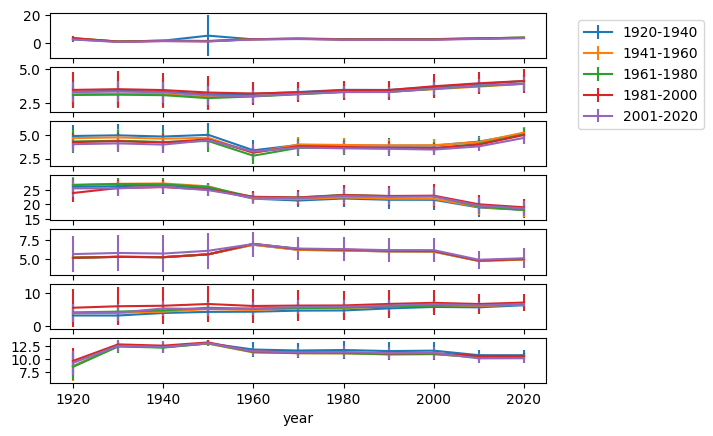

<Figure size 1000x500 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, sharex = True)

for key, group in bertj.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax1)
for key, group in mbert.groupby('dec_lab'):
  group.plot('year', 'mean', yerr='stdev',
              label=key, ax=ax2)
for key, group in rinna.groupby('dec_lab'):
  group.plot('year', 'mean', yerr='stdev',
              label=key, ax=ax3)
for key, group in neox.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax4)
for key, group in neoxj.groupby('dec_lab'):
  group.plot('year', 'mean', yerr='stdev',
              label=key, ax=ax5)
for key, group in mgpt.groupby('dec_lab'):
  group.plot('year', 'mean', yerr='stdev',
              label=key, ax=ax6)
for key, group in gpt2.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax7)

# ax1.set_title('GPT-2-J')
# ax2.set_title('GPT-NeoX')
plt.figure(figsize=(10,5))

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()
ax6.get_legend().remove()
ax7.get_legend().remove()

plt.show()

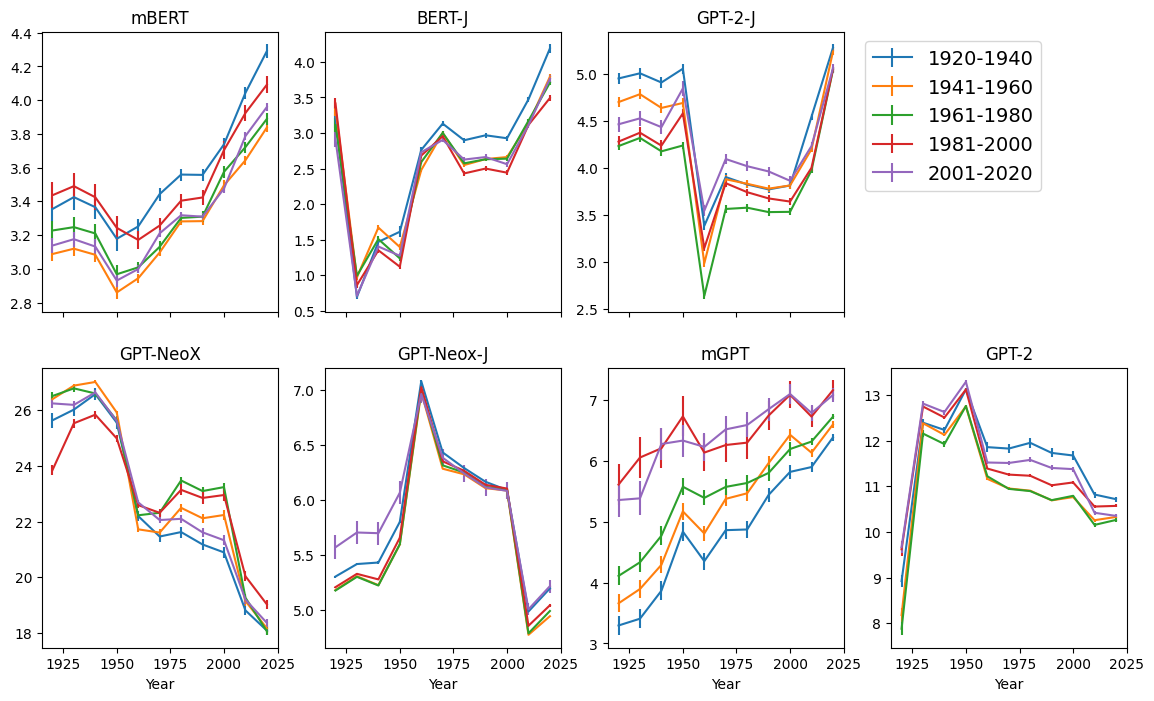

In [20]:
# using stderror instead of stdev

fig, ax = plt.subplots(2, 4, sharex = True)

for key, group in mbert.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax[0, 0])
ax[0, 0].set_title('mBERT')

for key, group in bertj.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax[0, 1])
ax[0, 1].set_title('BERT-J')

for key, group in rinna.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax[0, 2])
ax[0, 2].set_title('GPT-2-J')

for key, group in mgpt.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax[1, 2])
ax[1, 2].set_title('mGPT')

for key, group in neox.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax[1, 0])
ax[1, 0].set_title('GPT-NeoX')

for key, group in neoxj.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax[1, 1])
ax[1, 1].set_title('GPT-Neox-J')

for key, group in gpt2.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax[1, 3])
ax[1, 3].set_title('GPT-2')

# ax1.set_title('GPT-2-J')
# ax2.set_title('GPT-NeoX')

# plt.legend(fontsize="9", loc ="upper right")
ax[0, 2].legend(bbox_to_anchor=(1.05, 1.0), fontsize="14", loc='upper left')
ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
ax[1, 3].get_legend().remove()
ax[1, 2].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()

fig.delaxes(ax[0, 3])

# f = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(8)

# plt.ylim([0, 34])
ax[1, 0].set_xlabel('Year')
ax[1, 1].set_xlabel('Year')
ax[1, 2].set_xlabel('Year')
ax[1, 3].set_xlabel('Year')

plt.savefig("/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/dec_all_models.pdf", bbox_inches="tight")

plt.show()

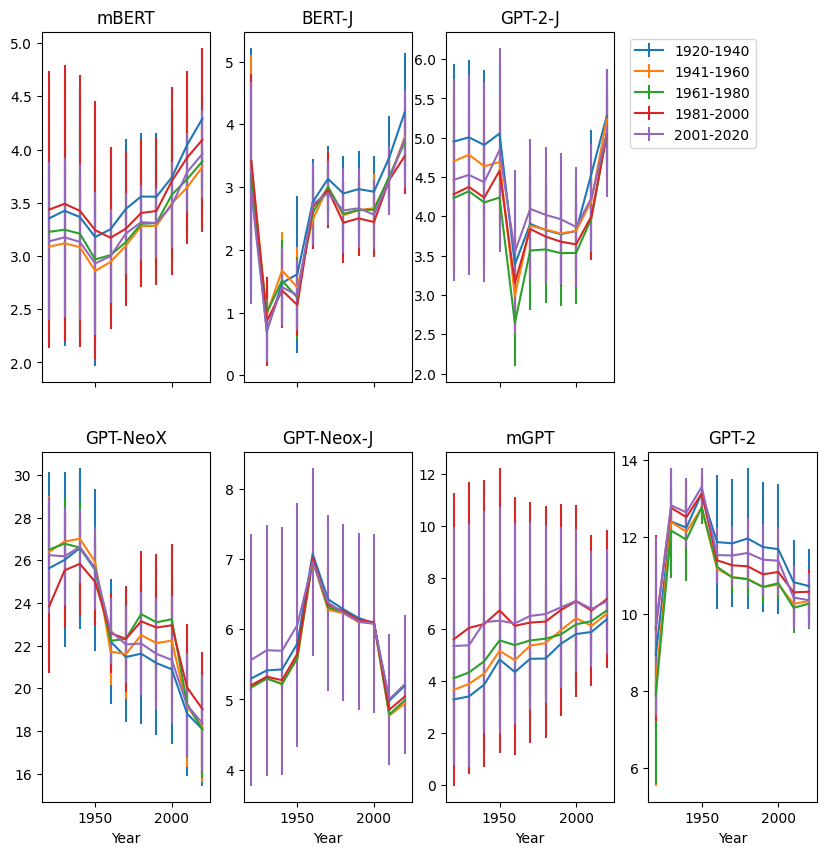

In [ ]:
fig, ax = plt.subplots(2, 4, sharex = True)

for key, group in mbert.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax[0, 0])
ax[0, 0].set_title('mBERT')

for key, group in bertj.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax[0, 1])
ax[0, 1].set_title('BERT-J')

for key, group in rinna.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax[0, 2])
ax[0, 2].set_title('GPT-2-J')

for key, group in mgpt.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax[1, 2])
ax[1, 2].set_title('mGPT')

for key, group in neox.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax[1, 0])
ax[1, 0].set_title('GPT-NeoX')

for key, group in neoxj.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax[1, 1])
ax[1, 1].set_title('GPT-Neox-J')

for key, group in gpt2.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax[1, 3])
ax[1, 3].set_title('GPT-2')

# ax1.set_title('GPT-2-J')
# ax2.set_title('GPT-NeoX')

# plt.legend(fontsize="9", loc ="upper right")
ax[0, 2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
ax[1, 3].get_legend().remove()
ax[1, 2].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()

fig.delaxes(ax[0, 3])

# f = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

# plt.ylim([0, 34])
ax[1, 0].set_xlabel('Year')
ax[1, 1].set_xlabel('Year')
ax[1, 2].set_xlabel('Year')
ax[1, 3].set_xlabel('Year')

plt.savefig("/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/dec_all_models.pdf", bbox_inches="tight")

plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.show()

<Figure size 1000x1000 with 0 Axes>

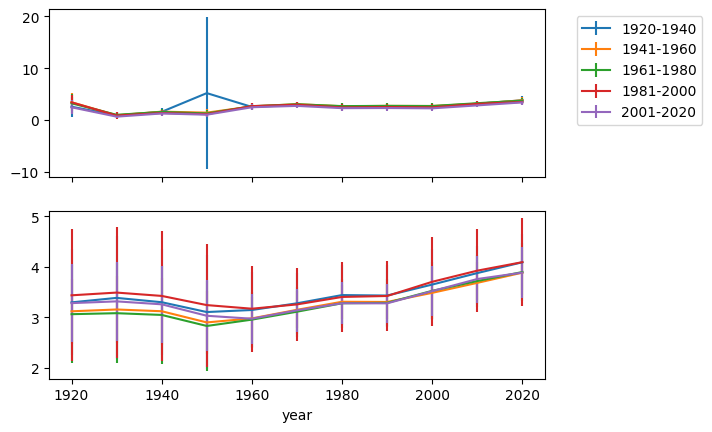

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True)

for key, group in bertj.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax1)
for key, group in mbert.groupby('dec_lab'):
  group.plot('year', 'mean', yerr='stdev',
              label=key, ax=ax2)

# ax1.set_title('GPT-2-J')
# ax2.set_title('GPT-NeoX')

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.get_legend().remove()
plt.show()

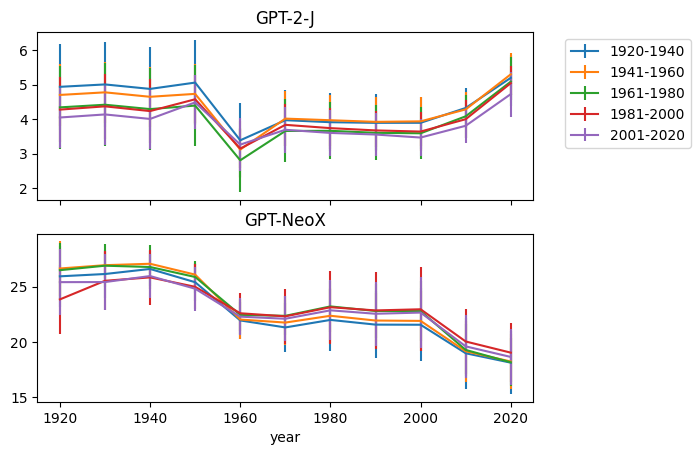

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True)

for key, group in rinna.groupby('dec_lab'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax1)
for key, group in neox.groupby('dec_lab'):
  group.plot('year', 'mean', yerr='stdev',
              label=key, ax=ax2)

ax1.set_title('GPT-2-J')
ax2.set_title('GPT-NeoX')

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.get_legend().remove()
plt.show()

In [ ]:
# l = [lines[2], lines[13], lines[24], lines[35], lines[46], lines[57], lines[68]]

# l = [i.strip() for i in l]
# floats = [float(x) for x in l]

# floats

In [ ]:
# for BOTH gen, job_is

comb = pd.DataFrame()

for yr in [2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920]:
  file3 = open('/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/mean_both/mean_stdev_' + str(yr) + '_both.txt', 'r')
  lines = file3.readlines()

  df = pd.DataFrame()
  df['model'] = ['GPT-2', 'mBERT', 'mGPT', 'NeoX-J', 'GPT-2-J', 'BERT-J', 'NeoX']
  df['year'] = [yr] * 7

  means = [lines[2], lines[13], lines[24], lines[35], lines[46], lines[57], lines[68]]
  means = [i.strip() for i in means]
  means = [float(x) for x in means]
  df['mean'] = means

  stdev = [lines[3], lines[14], lines[25], lines[36], lines[47], lines[58], lines[69]]
  stdev = [i.strip() for i in stdev]
  stdev = [float(x) for x in stdev]
  df['stdev'] = stdev

  frames = [comb, df]
  comb = pd.concat(frames)

comb

,model,year,mean,stdev
0,GPT-2,2020,10.504302,0.741142
1,mBERT,2020,4.186691,0.663362
2,mGPT,2020,6.755350,1.188181
3,NeoX-J,2020,5.207371,0.487754
4,GPT-2-J,2020,5.172958,0.639249
...,...,...,...,...
2,mGPT,1920,4.548352,3.214289
3,NeoX-J,1920,5.349982,0.808750
4,GPT-2-J,1920,4.679168,0.957599
5,BERT-J,1920,3.379084,1.928580


In [ ]:
# /content/drive/MyDrive/bias in LMs/constrained decoding/kl div/mean stdev normal men, wom, both/mean_stdev_2020_both.txt

In [ ]:
import matplotlib.pyplot as plt

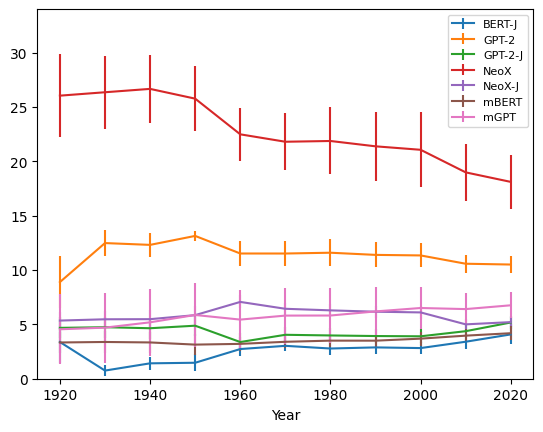

In [ ]:
# BOTH, JOB_IS

fig, ax = plt.subplots()

for key, group in comb.groupby('model'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax)

plt.legend(fontsize="8", loc ="upper right")
plt.ylim([0, 34])
plt.xlabel('Year')
plt.savefig("/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/job_is_both.pdf", bbox_inches="tight")

plt.show()

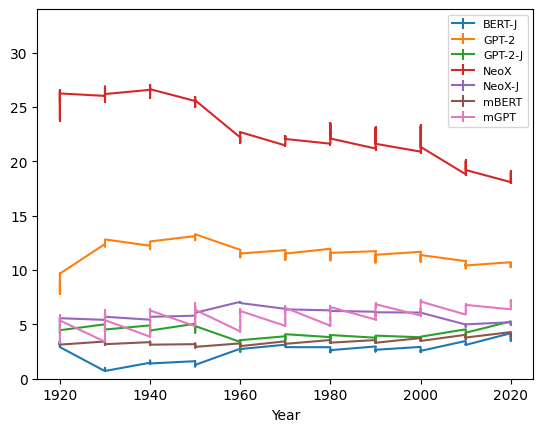

In [18]:
# BOTH, JOB_IS

# with standard error

fig, ax = plt.subplots()

for key, group in comb.groupby('model'):
    group.plot('year', 'mean', yerr='sterror',
               label=key, ax=ax)

plt.legend(fontsize="8", loc ="upper right")
plt.ylim([0, 34])
plt.xlabel('Year')
plt.savefig("/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/job_is_both.pdf", bbox_inches="tight")

plt.show()

In [ ]:
from google.colab import files

In [ ]:
plt.savefig("/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/kl_all.pdf")


<Figure size 640x480 with 0 Axes>

In [ ]:
# for BOTH gen, job_type

comb = pd.DataFrame()

for yr in [2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920]:
  file3 = open('/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/mean_both/mean_stdev_' + str(yr) + '_both.txt', 'r')
  lines = file3.readlines()

  df = pd.DataFrame()
  df['model'] = ['GPT-2', 'mBERT', 'mGPT', 'NeoX-J', 'GPT-2-J', 'BERT-J', 'NeoX']
  df['year'] = [yr] * 7

  means = [lines[5], lines[16], lines[27], lines[38], lines[49], lines[60], lines[71]]
  means = [i.strip() for i in means]
  means = [float(x) for x in means]
  df['mean'] = means

  stdev = [lines[6], lines[17], lines[28], lines[39], lines[50], lines[61], lines[72]]
  stdev = [i.strip() for i in stdev]
  stdev = [float(x) for x in stdev]
  df['stdev'] = stdev

  frames = [comb, df]
  comb = pd.concat(frames)

comb

,model,year,mean,stdev
0,GPT-2,2020,10.057579,0.857035
1,mBERT,2020,4.221548,0.684942
2,mGPT,2020,6.644179,1.569750
3,NeoX-J,2020,5.160610,0.251911
4,GPT-2-J,2020,4.158549,0.628899
...,...,...,...,...
2,mGPT,1920,3.749863,3.775400
3,NeoX-J,1920,5.232296,0.128825
4,GPT-2-J,1920,4.342060,0.885511
5,BERT-J,1920,2.701964,1.788037


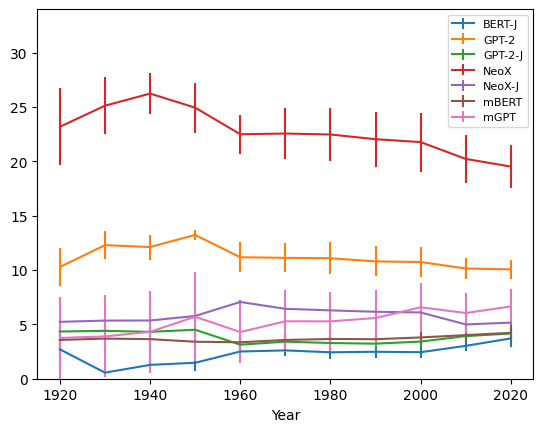

In [ ]:
# BOTH, JOB_TYPE

fig, ax = plt.subplots()

for key, group in comb.groupby('model'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax)

plt.legend(fontsize="8", loc ="upper right")
plt.ylim([0, 34])
plt.xlabel('Year')
plt.savefig("/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/job_type_both.pdf", bbox_inches="tight")

plt.show()

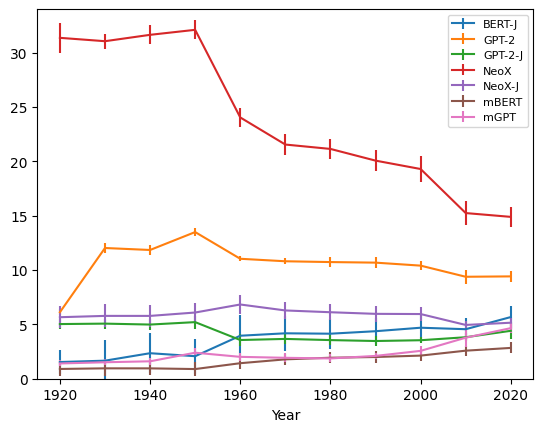

In [ ]:
# for BOTH gen, job_Q

comb = pd.DataFrame()

for yr in [2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920]:
  file3 = open('/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/mean_both/mean_stdev_' + str(yr) + '_both.txt', 'r')
  lines = file3.readlines()

  df = pd.DataFrame()
  df['model'] = ['GPT-2', 'mBERT', 'mGPT', 'NeoX-J', 'GPT-2-J', 'BERT-J', 'NeoX']
  df['year'] = [yr] * 7

  means = [lines[8], lines[19], lines[30], lines[41], lines[52], lines[63], lines[74]]
  means = [i.strip() for i in means]
  means = [float(x) for x in means]
  df['mean'] = means

  stdev = [lines[9], lines[20], lines[31], lines[42], lines[53], lines[64], lines[75]]
  stdev = [i.strip() for i in stdev]
  stdev = [float(x) for x in stdev]
  df['stdev'] = stdev

  frames = [comb, df]
  comb = pd.concat(frames)

# BOTH, JOB_Q

fig, ax = plt.subplots()

for key, group in comb.groupby('model'):
    group.plot('year', 'mean', yerr='stdev',
               label=key, ax=ax)

plt.legend(fontsize="8", loc ="upper right")
plt.ylim([0, 34])
plt.xlabel('Year')
plt.savefig("/content/drive/MyDrive/bias in LMs/constrained decoding/kl div/job_Q_both.pdf", bbox_inches="tight")

plt.show()